In [1]:
# Unit 5 - Financial Planning
### Initialized Imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

load_dotenv()

True

In [2]:
## Part 1- Personal Finance Planner

### Set the current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

crypto_portfolio = {"Portfolio":[1.2,5.3]}

tickers = ["BTC","ETH"]

portfolio_df = pd.DataFrame(crypto_portfolio, index=tickers)

portfolio_df

,Portfolio
BTC,1.2
ETH,5.3


In [3]:
### Setting the crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

### Fetching the current BTC price
btc_price = requests.get(btc_url).json()

### Fetching the current ETH price
eth_price = requests.get(eth_url).json()

###Printing details from website to use for parsing
print(json.dumps(btc_price, indent = 4))
print(json.dumps(eth_price, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18749831,
            "total_supply": 18749831,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 34239.0,
                    "volume_24h": 27142063364,
                    "market_cap": 641759540599,
                    "percentage_change_1h": -0.0333269495771248,
                    "percentage_change_24h": 1.0173359907307,
                    "percentage_change_7d": -4.80894319764796,
                    "percent_change_1h": -0.0333269495771248,
                    "percent_change_24h": 1.0173359907307,
                    "percent_change_7d": -4.80894319764796
                },
                "CAD": {
                    "price": 42709.7286,
                    "volume_24h": 33857009840.2536,
                   

In [4]:
### Computing the current value of my crpto

## Parsing the data
btc_price_1 = btc_price["data"]["1"]["quotes"]["USD"]["price"]
eth_price_1 = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

### Getting value of crypto holdings
my_btc_value = my_btc*btc_price_1
my_eth_value = my_eth*eth_price_1

### Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41086.80
The current value of your 5.3 ETH is $12309.57


In [5]:
### Current amount of shares

my_agg = 200
my_spy = 50

shares_data = {"Shares":[200,50]}

tickers = ["AGG","SPY"]

df_shares = pd.DataFrame(shares_data, index = tickers)

df_shares

,Shares
AGG,200
SPY,50


In [6]:
### Setting Alpaca API key 

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

### Creating the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Formatting current date as ISO format

today = pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

### Set the tickers
tickers = ["AGG", "SPY"]

### Set timeframe to '1D' for Alpaca API
timeframe = "1D"

### Get current closing prices for SPY and AGG
### YOUR CODE HERE!

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

### Previewing the DataFrame
df_ticker

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-18 00:00:00-04:00  115.05  115.39  114.91  115.29  5438261  417.08   

                                                              
                               high    low   close    volume  
time                                                          
2021-06-18 00:00:00-04:00  417.8281  414.7  415.01  92753385

In [7]:
### Picking AGG and SPY close prices
df_closing_price = pd.DataFrame()

df_closing_price["AGG"] = df_ticker["AGG"]["close"]
df_closing_price["SPY"] = df_ticker["SPY"]["close"]

agg_close_price = df_closing_price["AGG"][0]
spy_close_price = df_closing_price["SPY"][0]

### Computing the current value of shares

my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

### Printing current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20750.50
The current value of your 200 AGG shares is $23058.00


In [8]:
### Printing AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.29
Current SPY closing price: $415.01


In [9]:
## Savings Health Analysis

### Set monthly household income
monthly_income = 12000

crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

### Creating savings DataFrame
data = {"amount":[crypto,shares]}


df_savings = pd.DataFrame(data, index=["crypto","shares"])

### Displaying savings DataFrame
display(df_savings)

,amount
crypto,53396.368
shares,43808.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

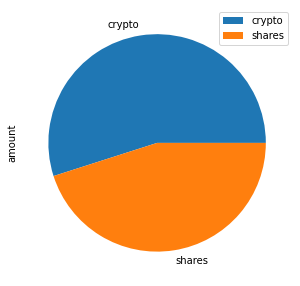

In [27]:
### Plotting savings pie chart
df_savings.plot.pie(subplots = True,figsize=(5, 5))


In [26]:
### Setting ideal emergency fund
emergency_fund = monthly_income * 3

emergency_fund

### Calculating the total amount of savings
# YOUR CODE HERE!
total_savings = crypto+shares
total_savings

### Validating savings health

if total_savings > emergency_fund:
    print(f"Congratulations on having ${round(total_savings,2)} saved up. This is enough money to cover for emergencies")
elif total_savings == emergency_fund:
    print(f"Congratulations on having saved upenough saved up for emergencies")
else:
    print(f"Create plan to increase savings. You are ${emergency_fund-total_savings} away from reaching your savings goal")

Congratulations on having $97204.87 saved up. This is enough money to cover for emergencies


In [12]:
## Part 2- Retirement Planning 


### Setting start and end dates of five years back from today. The sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-05', tz='America/New_York').isoformat()

### Getting 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

### Displaying sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [13]:
### Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

### Setting number of simulations
num_sims = 500

### Configure a Monte Carlo simulation to forecast 30 years daily returns


MC_Stocks = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

### Printing the simulation input data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [14]:
### Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000367,0.999418,0.992225,0.999081,0.997149,1.000096,0.993149,0.998274,1.002303,1.000632,...,1.003980,0.995021,1.010794,0.992248,1.005909,0.997268,1.003603,1.002921,0.995963,0.988541
2,1.003918,1.013318,0.999314,1.007507,0.981710,1.009209,0.990167,0.998788,1.003437,0.993320,...,0.989566,0.987712,1.005517,0.996520,0.992425,1.007835,1.009439,0.998754,1.004834,0.991802
3,1.003924,1.008673,0.999395,1.005986,0.974384,1.004201,0.999366,0.993727,0.999660,0.990707,...,1.000299,0.979830,1.011352,0.988402,0.992638,1.010064,1.018637,0.999015,1.010492,0.987973
4,1.000198,0.996959,0.998606,1.004613,0.967737,0.988918,0.993719,0.998385,0.996831,0.998161,...,0.995944,0.970501,1.015163,0.988261,0.992099,1.014667,1.021274,1.003400,1.014329,0.990042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.641940,8.682994,17.497932,3.064216,7.609670,10.211885,8.702245,16.542391,9.203567,12.880409,...,17.759772,18.711190,15.494068,16.335991,17.020063,20.946035,14.722197,13.962830,11.951293,12.784099
7557,12.748641,8.641454,17.600762,3.029809,7.609607,10.080461,8.711002,16.571464,9.209194,12.867041,...,17.717591,18.586068,15.513121,16.248748,17.133098,21.050991,14.619027,14.080951,12.036667,12.811856
7558,12.653574,8.622467,17.757700,3.018767,7.594489,10.016379,8.646810,16.555315,9.269450,12.738842,...,17.737790,18.631783,15.490146,16.071563,17.097027,21.261118,14.731571,13.999360,12.084722,12.783142
7559,12.791470,8.668960,17.825871,2.978320,7.562623,10.052340,8.616047,16.687568,9.258392,12.795634,...,17.883796,18.748397,15.518469,16.040765,16.931439,21.286791,14.758284,13.885747,12.139023,12.855724


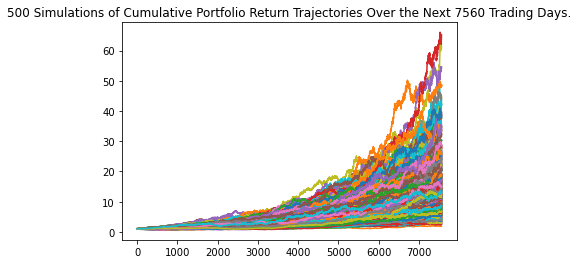

In [21]:
### Plotting simulation outcomes

line_plot = MC_Stocks.plot_simulation()

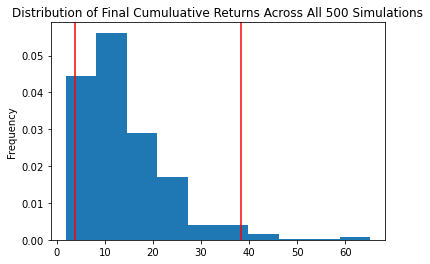

In [22]:
### Plotting probability distribution and confidence intervals
dist_plot = MC_Stocks.plot_distribution()

In [23]:
### Fetching summary statistics from the Monte Carlo simulation results
retirement_summary = MC_Stocks.summarize_cumulative_return()

### Printing summary statistics
print(retirement_summary)

count           500.000000
mean             14.047883
std               8.967678
min               1.852208
25%               7.781325
50%              11.961284
75%              17.861360
max              65.189531
95% CI Lower      3.766642
95% CI Upper     38.379934
Name: 7560, dtype: float64


In [24]:
### Setting initial investment
initial_investment = 20000

ci_lower = round(retirement_summary[8]*initial_investment,2)
ci_upper = round(retirement_summary[9]*initial_investment,2)

### Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75332.84 and $767598.69


In [25]:
### Setting initial investment
initial_investment = 20000 * 1.5

### Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(retirement_summary[8]*initial_investment,2)
ci_upper = round(retirement_summary[9]*initial_investment,2)

### Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $112999.26 and $1151398.03
